In [1]:
import scanpy as sc
import anndata as ad
import multigrate as mtg
from random import shuffle
from scipy import sparse
from matplotlib import pyplot as plt
import gdown

# Load the dataset

In [3]:
gdown.download(
    'https://drive.google.com/uc?id=1W1-YG9CXK1jbqM5vuDT8lHJMgxPyOt-D',
    'kotliarov2020-expressions.h5ad'
)

Downloading...
From: https://drive.google.com/uc?id=1W1-YG9CXK1jbqM5vuDT8lHJMgxPyOt-D
To: /home/aomidi/theis/multigrate/example/kotliarov-expressions.h5ad
420MB [02:22, 2.94MB/s] 


'kotliarov-expressions.h5ad'

In [3]:
scrna = sc.read('../data/kotliarov-2020/expressions.h5ad')
scrna

AnnData object with n_obs × n_vars = 52117 × 3999
    obs: 'batch', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_type_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [5]:
gdown.download(
    'https://drive.google.com/uc?id=1hfHJA37_684b63J4-ZMS0Nacw1NxLYCM',
    'kotliarov2020-proteins.h5ad'
)

Downloading...
From: https://drive.google.com/uc?id=1hfHJA37_684b63J4-ZMS0Nacw1NxLYCM
To: /home/aomidi/theis/multigrate/example/kotliarov-proteins.h5ad
145MB [00:48, 2.96MB/s] 


'kotliarov-proteins.h5ad'

In [5]:
cite = sc.read('../data/kotliarov-2020/protein.h5ad')
cite

AnnData object with n_obs × n_vars = 52117 × 87
    obs: 'batch', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type', 'n_genes'
    var: 'n_cells'
    uns: 'batch_colors', 'cell_type_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

# Paired setting

## Configure and train the model

In [6]:
model = mtg.models.MultiVAE(
    adatas=[[scrna], [cite]],
    names=[['RNA'], ['ADT']],
    pair_groups=[[0], [0]],
    condition=False,
    z_dim=20,
    h_dim=64,
    hiddens=[[], []],
    output_activations=['linear', 'linear'],
    losses=['nb', 'mse'],
    layers=[['count'], [None]],
    shared_hiddens=[],
    adver_hiddens=[],
    recon_coef=1,
    kl_coef=1e-5,
    integ_coef=1e-2, # don't have here as 1 dataset
    cycle_coef=0,
    adversarial=False,
    dropout=0.2,
)

In [7]:
model.train(
    n_iters=30000,
    batch_size=256,
    lr=3e-4,
    val_split=0.1,
    adv_iters=0,
    kl_anneal_iters=10000,
    validate_every=3000,
    verbose=1
)

/home/icb/anastasia.litinetskaya/miniconda3/envs/multigrate/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


 |████████████████████| 100.0% iter=30000/30000, time=48.74(s), loss=0.6896, recon=0.6890, kl=62.4221, integ=0.0000, cycle=0.0000, val_loss=0.6697, val_recon=0.6692, val_kl=57.1460, val_integ=0.0000, val_cycle=0.0000

## Plot training history

In [8]:
model.history

,iteration,train_loss,train_recon,train_kl,train_integ,train_cycle,val_loss,val_recon,val_kl,val_integ,val_cycle
0,3000,0.765470,0.765373,47.104909,0.0,0.0,0.699995,0.699817,59.308326,0,0
1,6000,0.756044,0.755680,75.365269,0.0,0.0,0.689969,0.689521,74.705194,0,0
2,9000,0.714758,0.714148,78.021712,0.0,0.0,0.688775,0.688067,78.584089,0,0
3,12000,0.703032,0.702272,76.554533,0.0,0.0,0.681942,0.681296,64.681809,0,0
4,15000,0.683058,0.682321,73.652328,0.0,0.0,0.676786,0.676149,63.646804,0,0
5,18000,0.735738,0.735033,70.485434,0.0,0.0,0.674968,0.674239,72.833194,0,0
6,21000,0.706168,0.705478,69.020145,0.0,0.0,0.673758,0.673165,59.397537,0,0
7,24000,0.670598,0.669930,66.866858,0.0,0.0,0.670368,0.669795,57.278448,0,0
8,27000,0.695757,0.695123,63.445939,0.0,0.0,0.669235,0.668596,63.951288,0,0
9,29999,0.689599,0.688975,62.422135,0.0,0.0,0.669732,0.669160,57.146008,0,0


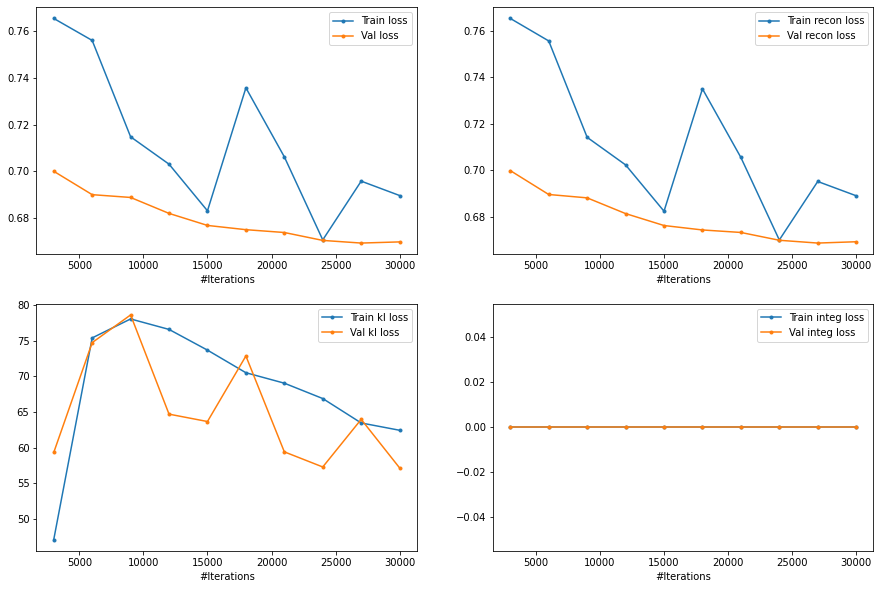

In [9]:
plt.figure(figsize=(15, 10));
plt.subplot(221);
plt.plot(model.history['iteration'], model.history['train_loss'], '.-', label='Train loss');
plt.plot(model.history['iteration'], model.history['val_loss'], '.-', label='Val loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(222);
plt.plot(model.history['iteration'], model.history['train_recon'], '.-', label='Train recon loss');
plt.plot(model.history['iteration'], model.history['val_recon'], '.-', label='Val recon loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(223);
plt.plot(model.history['iteration'], model.history['train_kl'], '.-', label='Train kl loss');
plt.plot(model.history['iteration'], model.history['val_kl'], '.-', label='Val kl loss');
plt.xlabel('#Iterations');
plt.legend();

plt.subplot(224);
plt.plot(model.history['iteration'], model.history['train_integ'], '.-', label='Train integ loss');
plt.plot(model.history['iteration'], model.history['val_integ'], '.-', label='Val integ loss');
plt.xlabel('#Iterations');
plt.legend();

## Recover and visualize the latent space

In [10]:
z = model.predict(
    adatas=[[scrna], [cite]],
    names=[['RNA'], ['ADT']],
    pair_groups=[[0], [0]],
    batch_size=256,
)
z

/home/icb/anastasia.litinetskaya/miniconda3/envs/multigrate/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


AnnData object with n_obs × n_vars = 52117 × 20
    obs: 'modality', 'barcode', 'cell_type', 'batch'

In [11]:
sc.pp.neighbors(z)
sc.tl.umap(z)

/home/icb/anastasia.litinetskaya/miniconda3/envs/multigrate/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
/home/icb/anastasia.litinetskaya/miniconda3/envs/multigrate/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities
/home/icb/anastasia.litinetskaya/miniconda3/envs/multigrate/lib/python3.7/site-packages/scanpy/tools/_umap.py:147: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  ada

/home/icb/anastasia.litinetskaya/miniconda3/envs/multigrate/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'modality' as categorical
... storing 'cell_type' as categorical


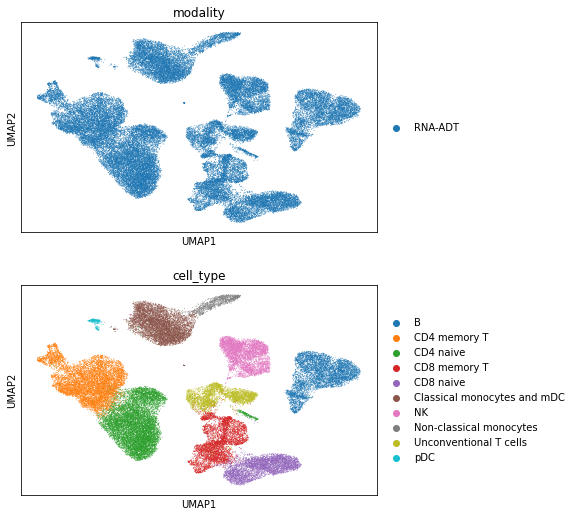

In [12]:
sc.pl.umap(z, color=['modality', 'cell_type'], ncols=1)

In [13]:
z.obs_names = z.obs.barcode
z.obs

,modality,barcode,cell_type,batch
barcode,,,,
AAACCTGAGAGCCCAA_H1B1ln1,RNA-ADT,AAACCTGAGAGCCCAA_H1B1ln1,NK,0
AAACCTGAGGCGTACA_H1B1ln1,RNA-ADT,AAACCTGAGGCGTACA_H1B1ln1,CD8 naive,0
AAACCTGCAGGTGGAT_H1B1ln1,RNA-ADT,AAACCTGCAGGTGGAT_H1B1ln1,CD4 naive,0
AAACCTGCAGTATCTG_H1B1ln1,RNA-ADT,AAACCTGCAGTATCTG_H1B1ln1,CD4 naive,0
AAACCTGCATCACAAC_H1B1ln1,RNA-ADT,AAACCTGCATCACAAC_H1B1ln1,Classical monocytes and mDC,0
...,...,...,...,...
TTTGTCAGTACGACCC_H1B2ln6,RNA-ADT,TTTGTCAGTACGACCC_H1B2ln6,Unconventional T cells,203
TTTGTCAGTCAAACTC_H1B2ln6,RNA-ADT,TTTGTCAGTCAAACTC_H1B2ln6,Unconventional T cells,203
TTTGTCATCCCATTTA_H1B2ln6,RNA-ADT,TTTGTCATCCCATTTA_H1B2ln6,NK,203


In [14]:
z.obs_names == scrna.obs_names

array([ True,  True,  True, ...,  True,  True,  True])

In [15]:
z.obs = scrna.obs
z.obs

,batch,cluster_level2,cluster_level3,sample,cell_type,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AAACCTGAGAGCCCAA_H1B1ln1,1,NK,CD16++ NK,256_d0,NK,723,723,6.584791,1567.0,7.357556,65.0,4.189655,4.148054
AAACCTGAGGCGTACA_H1B1ln1,1,CD8 naive,CD8 naive,273_d0,CD8 naive,776,776,6.655440,2754.0,7.921173,135.0,4.912655,4.901961
AAACCTGCAGGTGGAT_H1B1ln1,1,CD4 naive,CD4 naive,256_d0,CD4 naive,673,673,6.513230,2485.0,7.818430,43.0,3.784190,1.730382
AAACCTGCAGTATCTG_H1B1ln1,1,CD4 naive,CD4 naive,200_d0,CD4 naive,595,595,6.390241,1803.0,7.497762,31.0,3.465736,1.719357
AAACCTGCATCACAAC_H1B1ln1,1,Classical monocytes,Classical monocytes,233_d0,Classical monocytes and mDC,707,707,6.562444,1678.0,7.425954,57.0,4.060443,3.396901
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTACGACCC_H1B2ln6,2,Unconventional T cells,CD161 double-negative T,205_d0,Unconventional T cells,710,710,6.566672,1869.0,7.533694,64.0,4.174387,3.424291
TTTGTCAGTCAAACTC_H1B2ln6,2,Unconventional T cells,CD161 double-negative T,205_d0,Unconventional T cells,881,881,6.782192,2313.0,7.746733,69.0,4.248495,2.983139
TTTGTCATCCCATTTA_H1B2ln6,2,NK,CD16++ NK,268_d0,NK,743,743,6.612041,1943.0,7.572503,28.0,3.367296,1.441071
TTTGTCATCGAGAACG_H1B2ln6,2,Classical monocytes,Classical monocytes,234_d0,Classical monocytes and mDC,1006,1006,6.914731,2545.0,7.842279,82.0,4.418840,3.222004


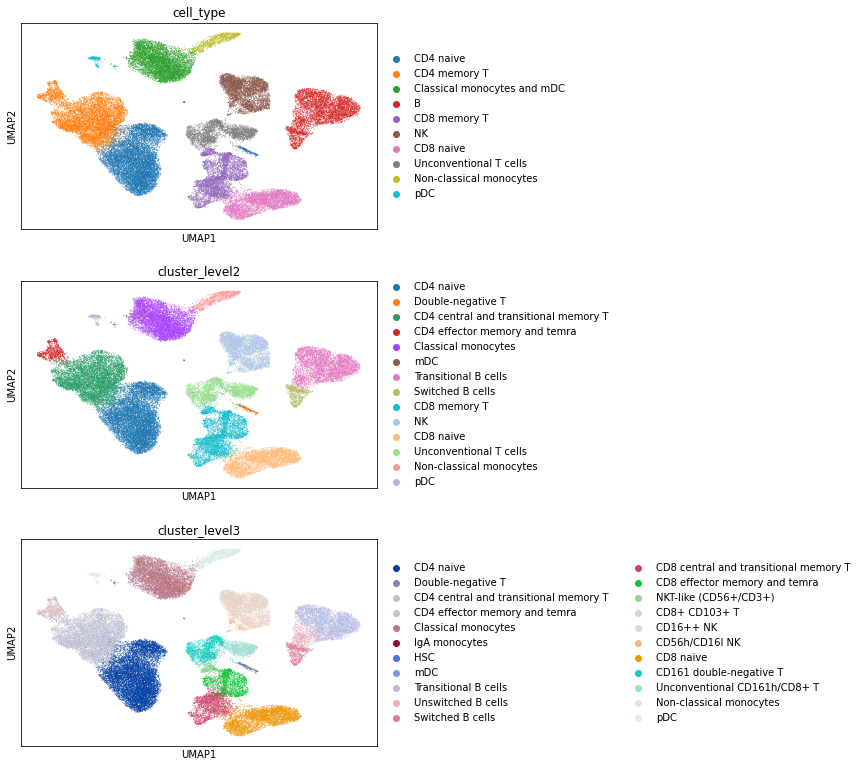

In [16]:
sc.pl.umap(z, color=['cell_type', 'cluster_level2', 'cluster_level3'], ncols=1)

In [17]:
z.write('../data/integrated/multigrate/kotliarov-multigrate.h5ad')